In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = "../data/001_raw/DatosClimaIkiam.csv"
ikiam = pd.read_csv(f,encoding="ANSI",sep=";",skiprows=[0,2],index_col=0, parse_dates=True)
ikiam.columns

Index(['taprm.japonesa (Temperatura)', 'hrprm (Humedad relativa)',
       'ghprm (Radiación global)', 'wsprm.japonesa (Velocidad del viento)',
       'wdprm.japonesa (Dirección de vientos)', 'taprm.m5147 (Temperatura)',
       'rhprm (humedad relativa)', 'ghrprm (Radiación global)',
       'dhrprm (Radiación solar difusa)',
       'wsprm.m5147 (Velocidad de los vientos)',
       'wdprm.m5147 (Dirección de los vientos)', 'tg1prm 0cm', 'tg2prm 5cm',
       'tg3prm 10cm ', 'tg4prm 30cm', 'tg5prm 50cm', 'tg6prm 60cm',
       'tg7prm 80cm '],
      dtype='object')

<Axes: xlabel='Time - desde 11de mayo 2024 hasta el 31 de diciembre del 2024'>

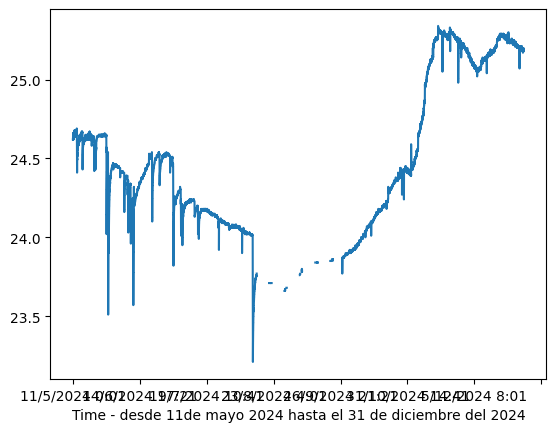

In [3]:
ikiam['tg7prm 80cm '].plot()

In [4]:
# ikiam['tg7prm 80cm '].resample("D").mean()

In [5]:
f = "../data/001_raw/DatosClimaIkiam.csv"
ikiam = pd.read_csv(f,encoding="ANSI",sep=";",skiprows=[0])
renombre = {
    'Time - desde 11de mayo 2024 hasta el 31 de diciembre del 2024':"tiempo",
    'ghprm (Radiación global)' :"Ig_ghprm",
    'ghrprm (Radiación global)':"Ig_ghrprm"    
}
ikiam.rename(columns=renombre,inplace=True)
ikiam.tiempo = pd.to_datetime(ikiam.tiempo,format="%d/%m/%Y %H:%M",errors="coerce")
ikiam.set_index("tiempo",inplace=True)
columnas = ikiam.columns
ikiam.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336961 entries, NaT to NaT
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   taprm.japonesa (Temperatura)            336961 non-null  float64
 1   hrprm (Humedad relativa)                77743 non-null   float64
 2   Ig_ghprm                                336961 non-null  float64
 3   wsprm.japonesa (Velocidad del viento)   336961 non-null  float64
 4   wdprm.japonesa (Dirección de vientos)   336961 non-null  int64  
 5   taprm.m5147 (Temperatura)               276016 non-null  float64
 6   rhprm (humedad relativa)                276016 non-null  float64
 7   Ig_ghrprm                               276016 non-null  float64
 8   dhrprm (Radiación solar difusa)         276016 non-null  float64
 9   wsprm.m5147 (Velocidad de los vientos)  276016 non-null  float64
 10  wdprm.m5147 (Dirección de los vientos)  27

In [6]:
Igs = [columna for columna in columnas if "Ig_" in columna]
tgs = [columna for columna in columnas if "tg" in columna]
Igs,tgs

(['Ig_ghprm', 'Ig_ghrprm'],
 ['tg1prm 0cm',
  'tg2prm 5cm',
  'tg3prm 10cm ',
  'tg4prm 30cm',
  'tg5prm 50cm',
  'tg6prm 60cm',
  'tg7prm 80cm '])

array([<Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>], dtype=object)

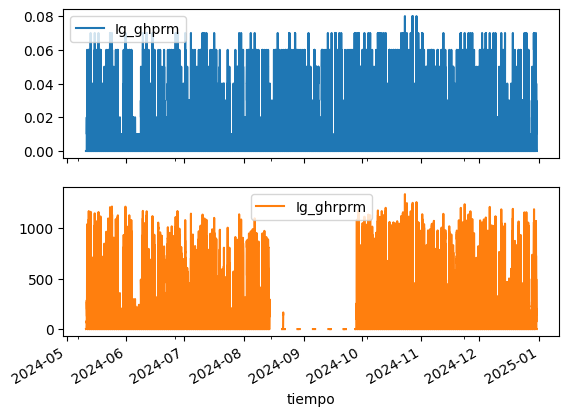

In [7]:
ikiam[Igs].plot(subplots=True)

In [8]:
ikiam[Igs].to_csv("../data/002_processed/ikiam_Igs.csv")
ikiam[Igs].to_parquet("../data/002_processed/ikiam_Igs.parquet")

In [9]:
ikiam[tgs].to_csv("../data/002_processed/ikiam_tgs.csv")
ikiam[tgs].to_parquet("../data/002_processed/ikiam_tgs.parquet")